# Data analysis of Lucas's Poll 

## Tools importation

In [1]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Basic tools
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib        as mpl
import matplotlib.dates  as mdates
%matplotlib inline

print('------------')
print('Tool version: ')
print(' - matplotlib : ' + str(mpl.__version__))
print(' - pandas     : ' + str(pd .__version__))
print(' - numpy      : ' + str(np .__version__))
print('------------')

# Plot settings
mpl.rcParams['legend.frameon'  ] = False
mpl.rcParams['legend.fontsize' ] = 'xx-large'
mpl.rcParams['xtick.labelsize' ] = 16
mpl.rcParams['ytick.labelsize' ] = 16
mpl.rcParams['axes.titlesize'  ] = 18
mpl.rcParams['axes.labelsize'  ] = 18
mpl.rcParams['lines.linewidth' ] = 2.5
mpl.rcParams['lines.markersize'] = 10

------------
Tool version: 
 - matplotlib : 2.1.0
 - pandas     : 0.22.0
 - numpy      : 1.13.3
------------


## Data preparation

In [2]:
# Load the data
featureName = ['stamp','your name','date','time','sex','weight','size','name','HairAmount','HairColor','HairStyle','Sign']
mydata = pd.read_csv('Responses.csv', names=featureName, parse_dates=[['date', 'time']])
mydata = mydata[1:]
print('\nSize of the dataset: {}'.format(len(mydata)))

# Making binary sex column
binary_sex = mydata['sex']
binary_sex = [int('boy' in s) for s in binary_sex]
mydata['sex'] = binary_sex

# Adding time difference with expected delivery time (14 Oct - 12h)
mydata['dt']     = pd.to_datetime(mydata['date_time']) - pd.to_datetime('10-14-2017 12:00:00')
mydata['dtresp'] = pd.to_datetime(mydata['stamp'])     - pd.to_datetime('09-02-2017 09:00:00')

# Adding answer time as index
mydata['stamp'] = pd.to_datetime(mydata['stamp'])
mydata.sort_values('stamp',inplace=True)

# Final conversions & printing
mydata = mydata.convert_objects(convert_numeric=True)
mydata.head()


Size of the dataset: 60


,date_time,stamp,your name,sex,weight,size,name,HairAmount,HairColor,HairStyle,Sign,dt,dtresp
11,10/5/2017 4:12:00 PM,2017-09-02 16:11:32,Mélisa Madar,1,3.40,54.0,Méliso,5,4,5,Beau gosse,-9 days +04:12:00,0 days 07:11:32
34,10/12/2017 8:00:00 AM,2017-09-02 17:57:35,Madar Sylvia,1,3.02,50.0,Erwan Paul Thibaut,4,3,4,beau gosse,-3 days +20:00:00,0 days 08:57:35
7,10/2/2017 12:00:00 AM,2017-09-02 18:02:12,Madar Eric,0,3.10,51.0,Léa Rose Cécilia,4,2,4,Fait bien ses nuits,-13 days +12:00:00,0 days 09:02:12
8,10/2/2017 5:20:00 PM,2017-09-02 23:03:20,Julien Faivre,1,3.50,50.0,"Erwan, Robert, RomainJr",2,4,3,Un tatouage sur le bras,-12 days +05:20:00,0 days 14:03:20
20,10/10/2017 2:00:00 PM,2017-09-04 20:50:58,Culle Jean,0,3.00,48.0,Jeanne Mireille Catherine,1,3,2,Un gros style,-4 days +02:00:00,2 days 11:50:58


## Statistical predictions  versus observation

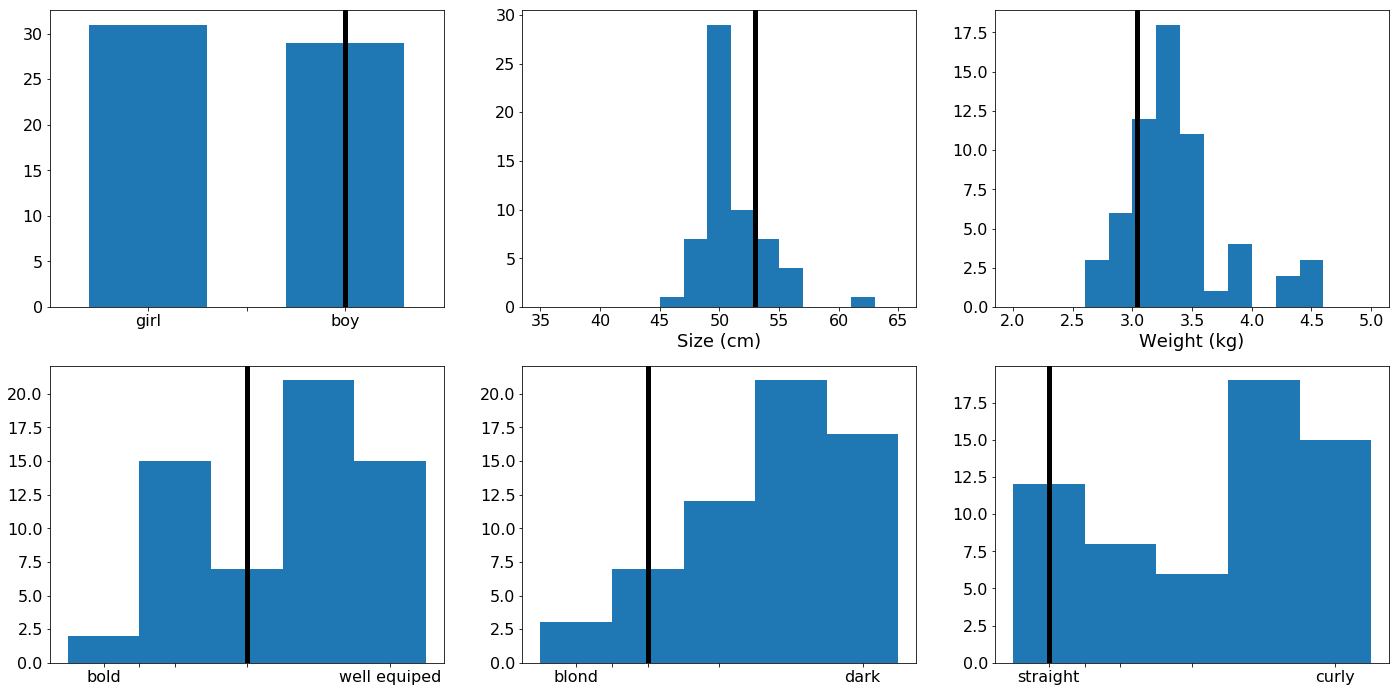

In [3]:
plt.figure(figsize=(24,12))

# Sex
plt.subplot(2,3,1)
plt.hist(mydata['sex'], bins=(-0.3,0.3,0.7,1.3) )
plt.xlim(-0.5,1.5)
plt.xticks([0,0.5,1],['girl','','boy'])
plt.axvline(x=1.0, color='black', linewidth=5.0)

# Size
plt.subplot(2,3,2)
plt.hist(mydata['size'], bins=15, range=(35,65))
plt.xlabel('Size (cm)')
plt.axvline(x=53.0, color='black', linewidth=5.0)

# Weight
plt.subplot(2,3,3)
plt.hist(mydata['weight'], bins=15, range=(2,5))
plt.xlabel('Weight (kg)')
plt.axvline(x=3.040, color='black', linewidth=5.0)

# Hair Amount
plt.subplot(2,3,4)
n,bins,_=plt.hist(mydata['HairAmount'], bins=5, range=(0.5,5.5))
plt.xticks([1,1.5,2,3,5],['bold','','','','well equiped'])
plt.axvline(x=3, color='black', linewidth=5.0)

# Hair Color
plt.subplot(2,3,5)
plt.hist(mydata['HairColor'], bins=5, range=(0.5,5.5))
plt.xticks([1,1.5,2,3,5],['blond','','','','dark'])
plt.axvline(x=2, color='black', linewidth=5.0)

# Hair Style
plt.subplot(2,3,6)
plt.hist(mydata['HairStyle'], bins=5, range=(0.5,5.5))
plt.xticks([1,1.5,2,3,5],['straight','','','','curly'])
plt.axvline(x=1, color='black', linewidth=5.0)

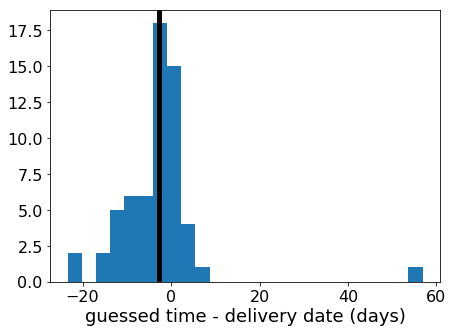

In [4]:
plt.figure(figsize=(7,5))
plt.hist( mydata['dt'].astype('timedelta64[h]')/24., bins=25)
plt.xlabel('guessed time - delivery date (days)')
dt_true =  pd.to_datetime('10-11-2017 19:40:00') - pd.to_datetime('10-14-2017 12:00:00')
dt_true = dt_true.total_seconds() / (24*3600.)
plt.axvline(x=dt_true, color='black', linewidth=5.0)

## Time and date of answers

Text(0,0.5,'Response Time (days)')

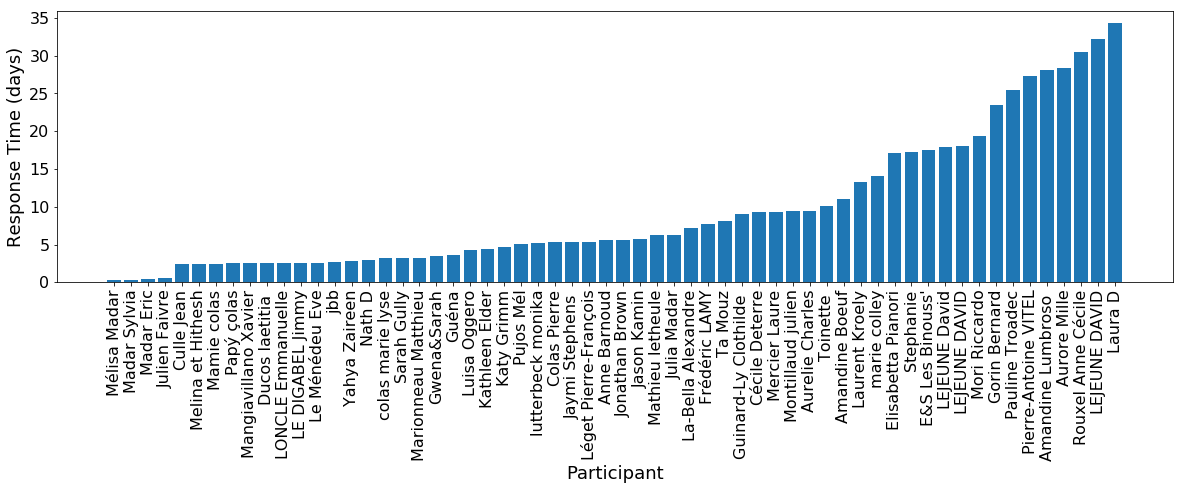

In [5]:
plt.figure(figsize=(20,5))
mydata_sorted = mydata.sort_values('dtresp')
names = mydata_sorted['your name']
times = mydata_sorted['dtresp'].astype('timedelta64[h]')/24.
plt.bar(np.arange(len(names)), times)
plt.xticks(np.arange(len(names)), names, rotation='vertical')
plt.xlabel('Participant')
plt.ylabel('Response Time (days)')

Text(0.5,0,'Response Time (days)')

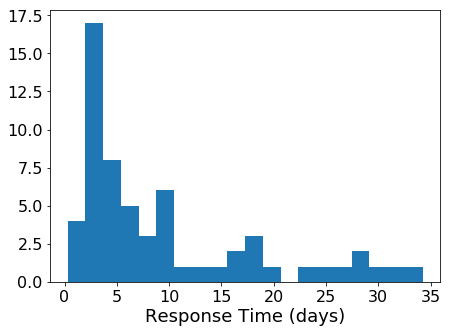

In [6]:
plt.figure(figsize=(7,5))
plt.hist( mydata['dtresp'].astype('timedelta64[h]')/24., bins=20)
plt.xlabel('Response Time (days)')

## Few correlation studies

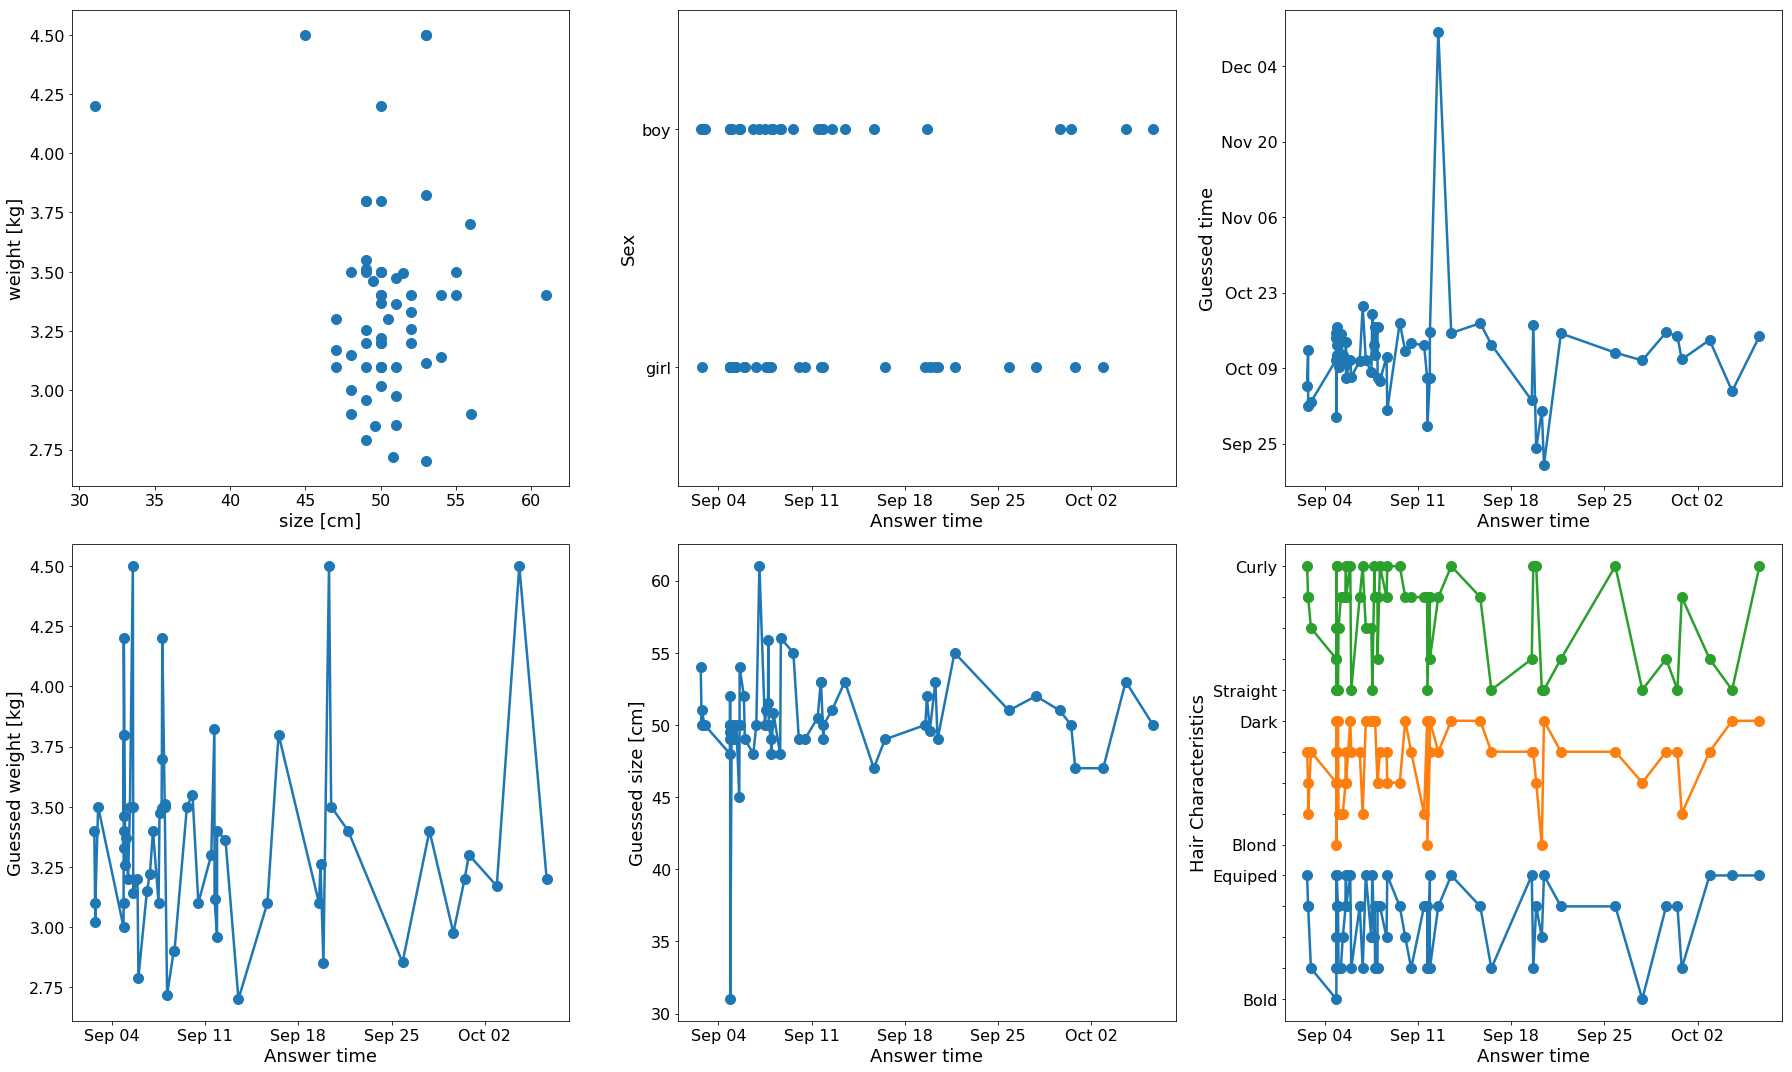

In [7]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
plt.scatter(mydata['size'],mydata['weight'])
plt.xlabel('size [cm]')
plt.ylabel('weight [kg]')

ax = plt.subplot(2,3,2)
ax.plot(mydata['stamp'], mydata['sex'], 'o' )
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_xlabel('Answer time')
ax.set_ylim(-0.5,1.5)
ax.set_ylabel('Sex')
ax.set_yticks([0,1])
ax.set_yticklabels(['girl','boy'])

ax = plt.subplot(2,3,3)
ax.plot(mydata['stamp'], pd.to_datetime(mydata['date_time']), 'o-' )
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.yaxis.set_major_locator(mdates.AutoDateLocator())
ax.yaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_xlabel('Answer time')
ax.set_ylabel('Guessed time')

ax = plt.subplot(2,3,4)
ax.plot(mydata['stamp'], mydata['weight'], 'o-'  )
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_xlabel('Answer time')
ax.set_ylabel('Guessed weight [kg]')

ax = plt.subplot(2,3,5)
ax.plot(mydata['stamp'], mydata['size'], 'o-' )
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_xlabel('Answer time')
ax.set_ylabel('Guessed size [cm]')

ax = plt.subplot(2,3,6)
ax.plot(mydata['stamp'], mydata['HairAmount'], 'o-' )
ax.plot(mydata['stamp'], mydata['HairColor'] + 5, 'o-' )
ax.plot(mydata['stamp'], mydata['HairStyle'] + 10, 'o-' )
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_xlabel('Answer time')
ax.set_ylabel('Hair Characteristics')
ax.set_yticks(range(1,16))
ax.set_yticklabels(['Bold','','','','Equiped','Blond','','','','Dark','Straight','','','','Curly'])

plt.tight_layout()

## Names analysis per gender

In [8]:
data_per_sex = mydata.groupby('sex')
for key,data in data_per_sex:
    if (key==0):
        dataGirl=data
    if (key==1):
        dataBoy = data

In [9]:
def getNames(data_frame):
    res=[]
    for name in data_frame['name']:
        for na in name.split(' '):
            if (na is not ''   and 
                na is not ' '  and 
                na is not ','  and
                na is not ';'  and 
                na is not '-'  and 
                '(' not in na  and
                ')' not in na    ):
                    finalname=na.replace(',','')
                    res.append( finalname )
                    
    ToBeRemoved = ['et','ou','hi']
    for s in ToBeRemoved:
        if (s in res):
            res.remove(s)
    res.sort()
    return res

namesGirl = getNames(dataGirl)
namesBoy  = getNames(dataBoy)

Text(0,0.5,'Number of names per entry')

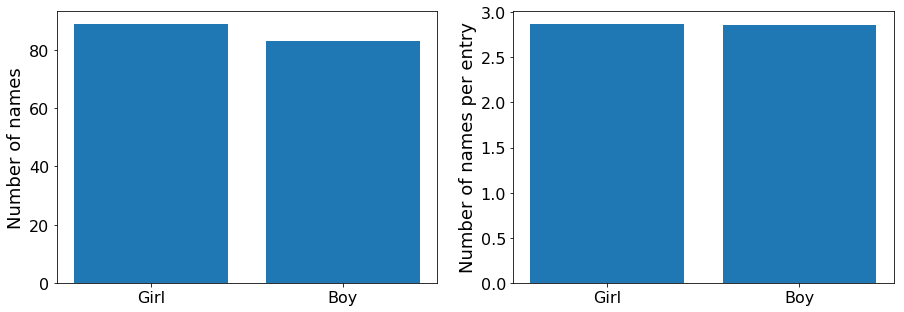

In [10]:
Ngirls = len(mydata[mydata['sex']==0])
Nboys  = len(mydata[mydata['sex']==1])
nameNumber = [len(namesGirl),len(namesBoy)]
nameRatio  = [len(namesGirl)/Ngirls,len(namesBoy)/Nboys]
sexIndex   = [0,1]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.bar(sexIndex,nameNumber)
plt.xticks(sexIndex,['Girl','Boy'])
plt.ylabel('Number of names')
           
plt.subplot(1,2,2)
plt.bar(sexIndex,nameRatio)
plt.xticks(sexIndex,['Girl','Boy'])
plt.ylabel('Number of names per entry')

In [11]:
from collections import Counter

def plotNameFrequency(name_array, title='', n=1):
        
    # Get the count and keep names with more than n counts
    counts = Counter(name_array)
    labels, values = zip(*counts.items())
    
    # sort your values in descending order
    indSort = np.argsort(values)[::-1]

    # rearrange/plot the data
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]
    labels = labels[values>n]
    values = values[values>n] 
    plt.figure(figsize=(20,5))
    plt.bar(np.arange(len(labels)), values)
    plt.xticks(np.arange(len(labels)), labels, rotation='vertical')
    plt.title(title)
    #plt.tight_layout()
    
    return

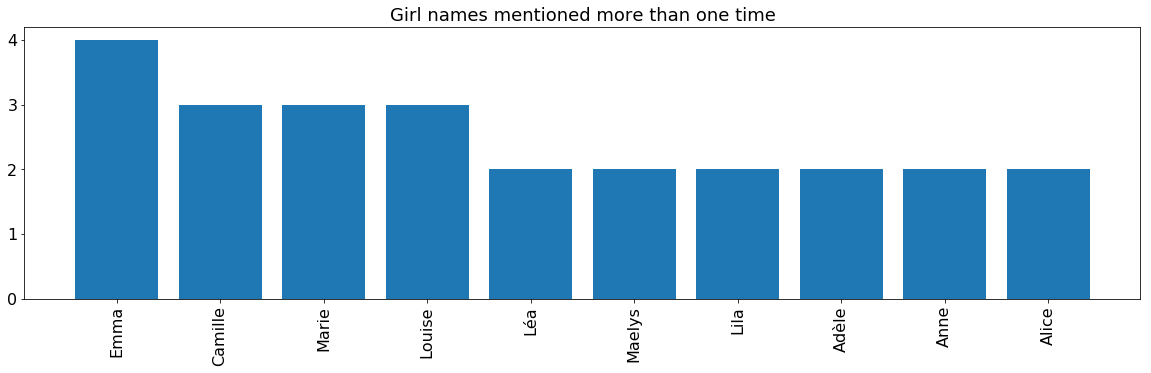

In [12]:
plotNameFrequency(namesGirl,'Girl names mentioned more than one time')

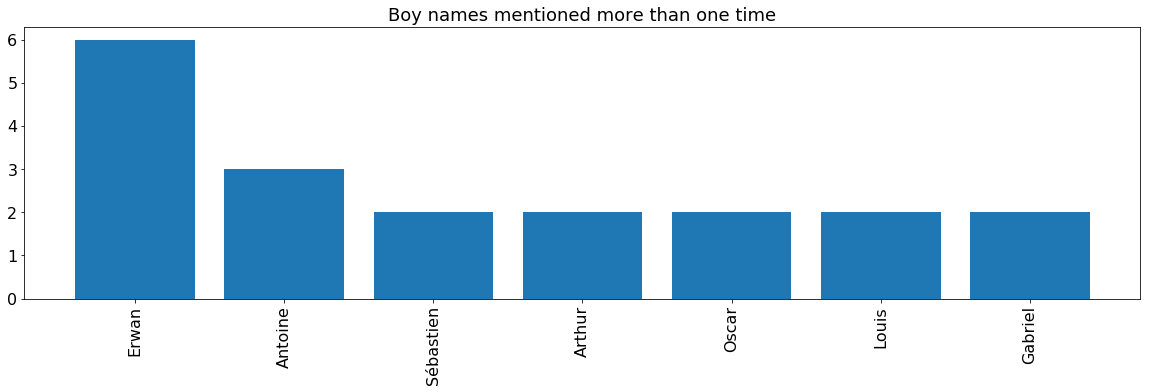

In [13]:
plotNameFrequency(namesBoy,'Boy names mentioned more than one time')

## Who are the winners?

In [14]:
mydata['dttrue']     = pd.to_datetime(mydata['date_time']) - pd.to_datetime('10-11-2017 19:40:00')
mydata['ddate_time'] = np.abs( mydata['dttrue'].astype('timedelta64[h]') )
mydata['dsize'  ]    = np.abs(mydata['size']       - 52.5 )
mydata['dweight']    = np.abs(mydata['weight']     - 3.040)
mydata['dHair']      = np.abs(mydata['HairAmount'] - 3) + np.abs(mydata['HairColor']-2) + np.abs(mydata['HairStyle']-1)

In [15]:
def makeBarPlotForWinner(varname,ylabel,n=3):
    is_sorted = mydata.sort_values(varname,ascending=True)
    names  = is_sorted['your name']
    values = is_sorted[varname]  
    ax = plt.bar(np.arange(n), values[:n])
    plt.xticks(np.arange(n), names[:n], rotation='vertical')
    plt.xlabel('{:.0f} first winners'.format(n))
    plt.ylabel(ylabel)
    return ax

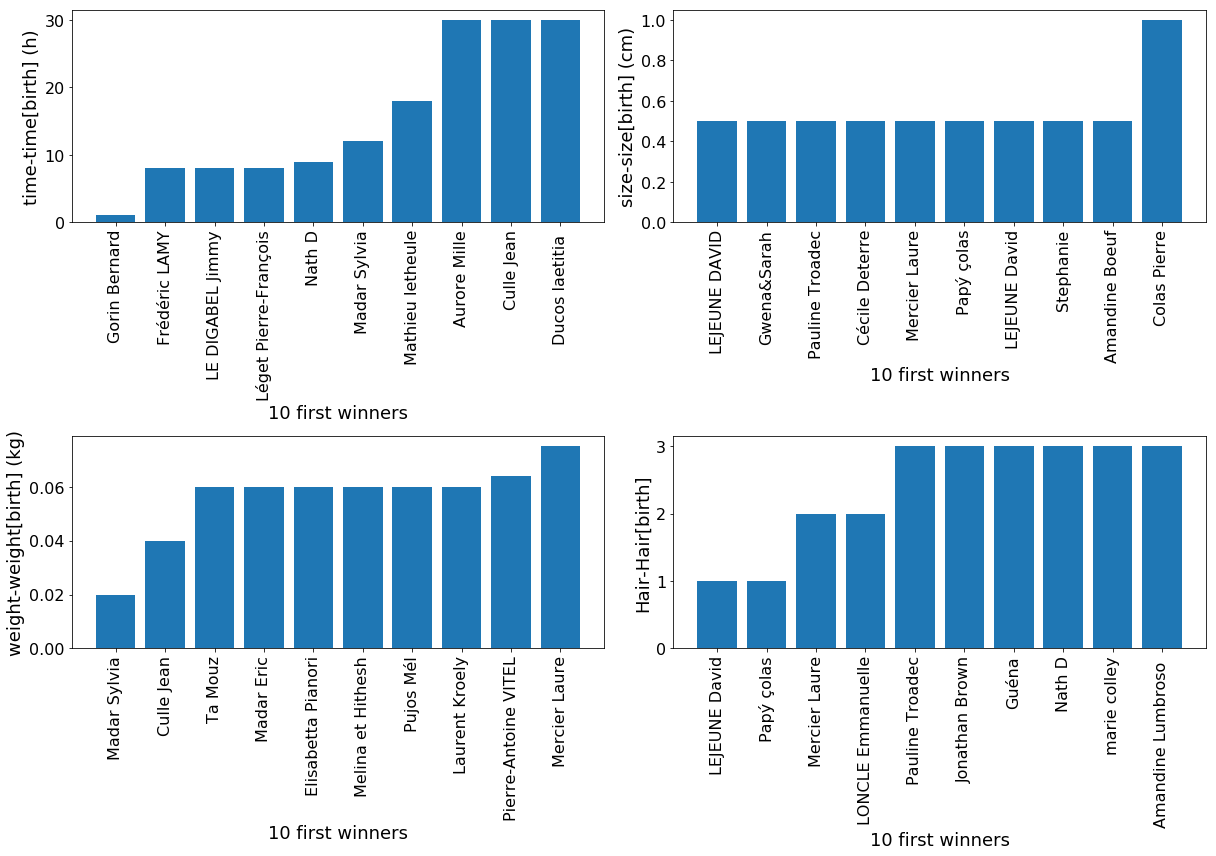

In [16]:
plt.figure(figsize=(17,12))

plt.subplot(2,2,1)
ax = makeBarPlotForWinner('ddate_time','time-time[birth] (h)',10)

plt.subplot(2,2,2)
ax = makeBarPlotForWinner('dsize','size-size[birth] (cm)',10)

plt.subplot(2,2,3)
ax = makeBarPlotForWinner('dweight','weight-weight[birth] (kg)',10)

plt.subplot(2,2,4)
ax = makeBarPlotForWinner('dHair','Hair-Hair[birth]',10)
                          
plt.tight_layout()

In [17]:
mydata.head(70)

,date_time,stamp,your name,sex,weight,size,name,HairAmount,HairColor,HairStyle,Sign,dt,dtresp,dttrue,ddate_time,dsize,dweight,dHair
11,10/5/2017 4:12:00 PM,2017-09-02 16:11:32,Mélisa Madar,1,3.40000,54.00,Méliso,5,4,5,Beau gosse,-9 days +04:12:00,0 days 07:11:32,-7 days +20:32:00,148.0,1.50,0.36000,8
34,10/12/2017 8:00:00 AM,2017-09-02 17:57:35,Madar Sylvia,1,3.02000,50.00,Erwan Paul Thibaut,4,3,4,beau gosse,-3 days +20:00:00,0 days 08:57:35,0 days 12:20:00,12.0,2.50,0.02000,5
7,10/2/2017 12:00:00 AM,2017-09-02 18:02:12,Madar Eric,0,3.10000,51.00,Léa Rose Cécilia,4,2,4,Fait bien ses nuits,-13 days +12:00:00,0 days 09:02:12,-10 days +04:20:00,236.0,1.50,0.06000,4
8,10/2/2017 5:20:00 PM,2017-09-02 23:03:20,Julien Faivre,1,3.50000,50.00,"Erwan, Robert, RomainJr",2,4,3,Un tatouage sur le bras,-12 days +05:20:00,0 days 14:03:20,-10 days +21:40:00,219.0,2.50,0.46000,5
20,10/10/2017 2:00:00 PM,2017-09-04 20:50:58,Culle Jean,0,3.00000,48.00,Jeanne Mireille Catherine,1,3,2,Un gros style,-4 days +02:00:00,2 days 11:50:58,-2 days +18:20:00,30.0,4.50,0.04000,4
46,10/15/2017 12:00:00 PM,2017-09-04 20:58:26,Melina et Hithesh,0,3.10000,50.00,"Emma, Nola, Ninon",2,4,2,brown eyes,1 days 00:00:00,2 days 11:58:26,3 days 16:20:00,88.0,2.50,0.06000,4
4,9/30/2017 12:20:00 AM,2017-09-04 20:59:16,Mamie colas,0,3.40000,50.00,Emma louise valentine,5,5,3,Grain de beaute sous le pied gauche,-15 days +12:20:00,2 days 11:59:16,-12 days +04:40:00,284.0,2.50,0.36000,7
42,10/14/2017 1:00:00 PM,2017-09-04 21:07:32,Papý çolas,1,3.33000,52.00,Juste,3,1,1,Suçera son gros orteil,0 days 01:00:00,2 days 12:07:32,2 days 17:20:00,65.0,0.50,0.29000,1
52,10/16/2017 5:00:00 PM,2017-09-04 21:08:20,Mangiavillano Xavier,0,3.80000,50.00,Alice Lea Laetitia,4,4,5,Va naître en rigolant,2 days 05:00:00,2 days 12:08:20,4 days 21:20:00,117.0,2.50,0.76000,7
21,10/10/2017 1:45:00 PM,2017-09-04 21:12:29,Ducos laetitia,1,3.80000,49.00,Théo Arthur Louis,4,3,5,Grains de beauté comme maman,-4 days +01:45:00,2 days 12:12:29,-2 days +18:05:00,30.0,3.50,0.76000,6
